###Aim:
#### To implement Hough Transform-based line and circle detection using OpenCV.


### Objective:
1. To read and process images for feature extraction.
2. To detect edges using Canny edge detection.
3. To apply Hough Line Transform to detect straight lines.
4. To apply Hough Circle Transform to detect circular shapes.
5. To visualize and analyze the detected features.

### Theory:
The Hough Transform is a technique used in image processing to detect geometric shapes like lines and circles.
It works by transforming points in an image space to a parameter space, where voting is performed to find the best-fitting shape.
The Canny edge detector helps in extracting prominent edges before applying the Hough Transform.


#Hough Transform from Scratch

In [ ]:
#importing libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import canny
from skimage.color import rgb2gray

In [ ]:
# Function to display images
def display_image(image, title="Image", cmap=None):
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap=cmap if cmap else 'gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [ ]:
# Function to compute the Hough Circle Transform accumulator
def hough_circle_accumulator(edges, radius):
    rows, cols = edges.shape
    accumulator = np.zeros((rows, cols), dtype=np.int32)
    edge_points = np.argwhere(edges)  # Get edge points

    for x, y in edge_points:
        for theta in range(0, 360):
            angle = np.deg2rad(theta)
            a = int(x - radius * np.cos(angle))
            b = int(y - radius * np.sin(angle))
            if 0 <= a < rows and 0 <= b < cols:
                accumulator[a, b] += 1

    return accumulator

In [ ]:
# Function to detect circles
def detect_circles(image, min_radius, max_radius, threshold):
    edges = canny(image, sigma=1.5)  # Apply Canny edge detection
    detected_circles = []

    for radius in range(min_radius, max_radius + 1):
        accumulator = hough_circle_accumulator(edges, radius)
        centers = np.argwhere(accumulator > threshold)  # Find circle centers
        for center in centers:
            detected_circles.append((center[0], center[1], radius))

    return detected_circles

In [ ]:
# Load and process the image
image_path = "/content/circle.png"
image = cv2.imread(image_path)

if image is None:
    raise ValueError("Error loading image. Check the path.")

In [ ]:
# Convert to grayscale if necessary
if len(image.shape) == 3:  # Checks if image has 3 channels (RGB)
    image = rgb2gray(image)  # Convert to grayscale in [0,1] range
    image = (image * 255).astype(np.uint8)  # Scale back to [0,255]

image = cv2.resize(image, (300, 300))


In [ ]:
# Detect circles
min_radius = 10
max_radius = 50
threshold = 150
circles = detect_circles(image, min_radius, max_radius, threshold)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-010347e0fbdb>", line 5, in <cell line: 0>
    circles = detect_circles(image, min_radius, max_radius, threshold)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-10-5309f0216671>", line 7, in detect_circles
    accumulator = hough_circle_accumulator(edges, radius)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-9-06b85ca50163>", line None, in hough_circle_accumulator
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'Keyboard

In [ ]:
# Draw detected circles
output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for x, y, r in circles:
    cv2.circle(output_image, (y, x), r, (0, 255, 0), 2)  # Green circle
    cv2.circle(output_image, (y, x), 2, (0, 0, 255), 3)  # Red center point

In [ ]:
# Display results
display_image(output_image, "Hough Circle Detection")


#Hough Transform using Function

In [ ]:
#importing libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import os

In [ ]:
# Function to download and read images
def download_and_read_image(url, save_as):
    try:
        if not os.path.exists(save_as):
            urllib.request.urlretrieve(url, save_as)
        return cv2.imread(save_as)
    except urllib.error.HTTPError as e:
        print(f"Error downloading image: {e}")
        return None
    except Exception as e:
        print(f"An error occurred during download: {e}")
        return None

In [ ]:
# Function to display images
def display_image(image, title="Image", cmap=None):
    plt.figure(figsize=(10, 10))
    if cmap:
        plt.imshow(image, cmap=cmap)
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

In [ ]:
# Sample image paths
line_image_path = "/content/line.jpg"
circle_image_path = "/content/circle.png"

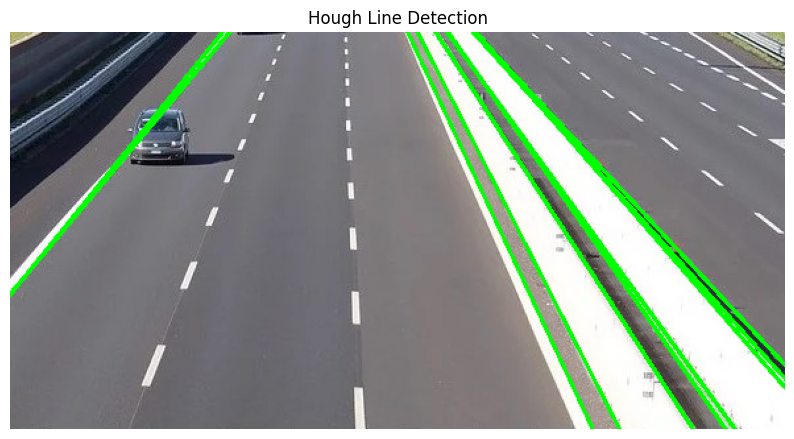

In [ ]:
# Load line detection image
line_image = cv2.imread(line_image_path)
if line_image is not None:
    gray_line_image = cv2.cvtColor(line_image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_line_image, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)

    line_image_copy = line_image.copy()
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(line_image_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)

        display_image(line_image_copy, "Hough Line Detection")
else:
    print("Error: Line detection skipped because image loading failed.")


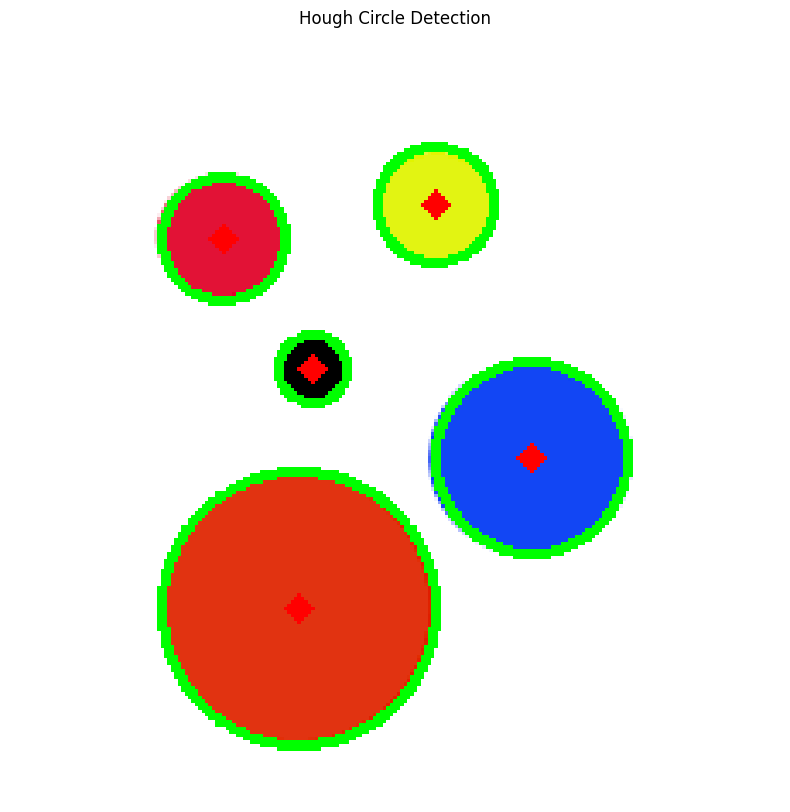

In [ ]:
# Load circle detection image
circle_image = cv2.imread(circle_image_path)
if circle_image is not None:
    gray_circle_image = cv2.cvtColor(circle_image, cv2.COLOR_BGR2GRAY)
    blurred_circle_image = cv2.GaussianBlur(gray_circle_image, (9, 9), 2)

    circles = cv2.HoughCircles(
        blurred_circle_image,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=20,
        param1=50,
        param2=30,
        minRadius=0,
        maxRadius=0
    )

    circle_image_copy = circle_image.copy()
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(circle_image_copy, (i[0], i[1]), i[2], (0, 255, 0), 2)
            cv2.circle(circle_image_copy, (i[0], i[1]), 2, (0, 0, 255), 3)

        display_image(circle_image_copy, "Hough Circle Detection")
else:
    print("Error: Circle detection skipped because image loading failed.")


###Conclusion:
The implementation successfully detected lines and circles in the given images using Hough Transform.
The Canny edge detector effectively enhanced the input before applying the transform.
 This technique is widely used in various applications like road lane detection, medical imaging, and object recognition.